In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_csv('dataset/train.csv')
test_dataset  = pd.read_csv('dataset/test.csv')

In [3]:
print("Size of train dataset: ", len(train_dataset))
print("Size of test dataset: ", len(test_dataset))

Size of train dataset:  22750
Size of test dataset:  12250


In [4]:
train_dataset.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
test_dataset.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


### Data Pre-processing

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Employee ID             22750 non-null object
Date of Joining         22750 non-null object
Gender                  22750 non-null object
Company Type            22750 non-null object
WFH Setup Available     22750 non-null object
Designation             22750 non-null float64
Resource Allocation     21369 non-null float64
Mental Fatigue Score    20633 non-null float64
Burn Rate               21626 non-null float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


### There are empty cells for Burn Rate, Mental Fatigue Score, Resource Allocation. 
* First Step remove Burn Rate empty cells horizontally.
* Second Step fill the resource allocation empty cells with mean value of Resource Allocation.
* We will cover later the mental fatigue score

In [7]:
train_dataset=(train_dataset[train_dataset['Burn Rate'].notnull()])

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
Employee ID             21626 non-null object
Date of Joining         21626 non-null object
Gender                  21626 non-null object
Company Type            21626 non-null object
WFH Setup Available     21626 non-null object
Designation             21626 non-null float64
Resource Allocation     20348 non-null float64
Mental Fatigue Score    19681 non-null float64
Burn Rate               21626 non-null float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [9]:
train_dataset['Resource Allocation'].value_counts()

4.0     3694
5.0     3670
3.0     3028
6.0     2817
2.0     1988
7.0     1880
1.0     1701
8.0      992
9.0      428
10.0     150
Name: Resource Allocation, dtype: int64

In [10]:
VALUE = train_dataset['Resource Allocation'].fillna(train_dataset['Resource Allocation'].median())

In [11]:
print(len(VALUE), VALUE[0], train_dataset['Resource Allocation'].median())

21626 3.0 4.0


In [12]:
train_dataset = train_dataset.drop('Resource Allocation',axis=1)

In [13]:
train_dataset.shape

(21626, 8)

In [14]:
train_dataset['Resource Allocation'] = VALUE

In [15]:
train_dataset.shape

(21626, 9)

In [16]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
Employee ID             21626 non-null object
Date of Joining         21626 non-null object
Gender                  21626 non-null object
Company Type            21626 non-null object
WFH Setup Available     21626 non-null object
Designation             21626 non-null float64
Mental Fatigue Score    19681 non-null float64
Burn Rate               21626 non-null float64
Resource Allocation     21626 non-null float64
dtypes: float64(4), object(5)
memory usage: 2.3+ MB


### Drop Employee ID

In [17]:
train_dataset = train_dataset.drop('Employee ID',axis=1)

In [18]:
train_dataset.shape

(21626, 8)

#### Map the relation ship between Mental Fatigue Score VS ALL

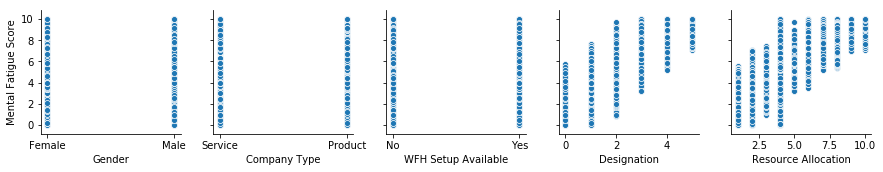

In [19]:
pp = sns.pairplot(data=train_dataset,
                  y_vars=['Mental Fatigue Score'],
                  x_vars=['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation'])

In [20]:
X1 = np.array(train_dataset['Designation'])
X2 = np.array(train_dataset['Resource Allocation'])
Y = np.array(train_dataset['Mental Fatigue Score'])

In [21]:
X1_test = X1[np.isnan(Y)]
X2_test = X2[np.isnan(Y)]

In [22]:
print(type(X1_test), X1_test.shape)

<class 'numpy.ndarray'> (1945,)


In [23]:
Y_train = Y[~np.isnan(Y)]
X1_train = X1[~np.isnan(Y)]
X2_train = X2[~np.isnan(Y)]

In [24]:
print(type(Y_train), Y_train.shape)

<class 'numpy.ndarray'> (19681,)


In [25]:
19681+1945

21626

In [26]:
X_train = pd.DataFrame({"X1":X1_train,"X2": X2_train})
X_test = pd.DataFrame({"X1":X1_test,"X2":X2_test})

In [27]:
Y_train = pd.Series(Y_train)

### Linear Regression For Mental Fatigue Score

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
train_x,validation_x,train_y,validation_y = train_test_split(X_train,Y_train,test_size=0.20,random_state=0)

In [30]:
train_x.head()

,X1,X2
19254,2.0,5.0
12305,3.0,6.0
11949,2.0,3.0
18750,2.0,2.0
15510,3.0,4.0


In [31]:
validation_x.head()

,X1,X2
18558,4.0,6.0
11386,2.0,4.0
11441,2.0,2.0
14682,2.0,6.0
12177,3.0,5.0


In [32]:
validation_y.head()

18558    8.0
11386    5.7
11441    3.6
14682    6.8
12177    5.2
dtype: float64

In [33]:
model1 = LinearRegression()

In [34]:
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predict_y = model1.predict(validation_x)

In [36]:
 from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(validation_y,predict_y)

1.4017091799474029

In [38]:
actul_prediction = model1.predict(X_test)

In [39]:
actul_prediction.shape

(1945,)

In [40]:
type(actul_prediction)

numpy.ndarray

In [41]:
train_dataset.keys()

Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Mental Fatigue Score', 'Burn Rate',
       'Resource Allocation'],
      dtype='object')

In [42]:
train_dataset['Mental Fatigue Score'].head(10)

0    3.8
1    5.0
2    5.8
3    2.6
4    6.9
5    3.6
6    7.9
7    4.4
8    NaN
9    NaN
Name: Mental Fatigue Score, dtype: float64

In [43]:
train_dataset[train_dataset['Mental Fatigue Score'].isnull()].shape

(1945, 8)

In [44]:
actul_prediction.shape

(1945,)

In [45]:
actul_prediction = pd.Series(actul_prediction)

In [46]:
train_dataset.loc[:,'Mental Fatigue Score'].head()

0    3.8
1    5.0
2    5.8
3    2.6
4    6.9
Name: Mental Fatigue Score, dtype: float64

In [47]:
import math
MENTAL_LIST=[]
j=0
actul_prediction = list(actul_prediction)
for i in list(train_dataset['Mental Fatigue Score']):
    if(math.isnan(i)):
        MENTAL_LIST.append(round(actul_prediction[j],2))
        j += 1
    else:
        MENTAL_LIST.append(i)

In [48]:
print(j)
print(len(MENTAL_LIST))
print(len(train_dataset['Mental Fatigue Score']))

1945
21626
21626


In [49]:
train_dataset['Mental Fatigue Score'].head(15)

0     3.8
1     5.0
2     5.8
3     2.6
4     6.9
5     3.6
6     7.9
7     4.4
8     NaN
9     NaN
10    5.3
11    1.8
12    NaN
13    NaN
14    5.8
Name: Mental Fatigue Score, dtype: float64

In [50]:
for i in MENTAL_LIST:
    if(math.isnan(i)):
        print(True)

In [51]:
train_dataset = train_dataset.drop('Mental Fatigue Score',axis=1)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 7 columns):
Date of Joining        21626 non-null object
Gender                 21626 non-null object
Company Type           21626 non-null object
WFH Setup Available    21626 non-null object
Designation            21626 non-null float64
Burn Rate              21626 non-null float64
Resource Allocation    21626 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.9+ MB


In [52]:
MENTAL_SERIES=pd.Series(MENTAL_LIST)
len(MENTAL_SERIES)

21626

In [53]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 7 columns):
Date of Joining        21626 non-null object
Gender                 21626 non-null object
Company Type           21626 non-null object
WFH Setup Available    21626 non-null object
Designation            21626 non-null float64
Burn Rate              21626 non-null float64
Resource Allocation    21626 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.9+ MB


In [54]:
df2 = pd.DataFrame({"Mental Fatigue Score": MENTAL_SERIES})

In [55]:
df2.shape

(21626, 1)

In [56]:
train_dataset.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [57]:
train = pd.concat([train_dataset, df2], axis=1)

In [58]:
train.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score
0,2008-09-30,Female,Service,No,2.0,0.16,3.0,3.80
1,2008-11-30,Male,Service,Yes,1.0,0.36,2.0,5.00
2,2008-03-10,Female,Product,Yes,2.0,0.49,4.0,5.80
3,2008-11-03,Male,Service,Yes,1.0,0.20,1.0,2.60
4,2008-07-24,Female,Service,No,3.0,0.52,7.0,6.90
5,2008-11-26,Male,Product,Yes,2.0,0.29,4.0,3.60
6,2008-01-02,Female,Service,No,3.0,0.62,6.0,7.90
7,2008-10-31,Female,Service,Yes,2.0,0.33,4.0,4.40
8,2008-12-27,Female,Service,No,3.0,0.56,6.0,6.89
9,2008-03-09,Female,Product,No,3.0,0.67,6.0,6.89


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 8 columns):
Date of Joining         21626 non-null object
Gender                  21626 non-null object
Company Type            21626 non-null object
WFH Setup Available     21626 non-null object
Designation             21626 non-null float64
Burn Rate               21626 non-null float64
Resource Allocation     21626 non-null float64
Mental Fatigue Score    21626 non-null float64
dtypes: float64(4), object(4)
memory usage: 1.3+ MB


In [60]:
train.isnull().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Burn Rate               0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

##### Step 1 is done.
##### Date Handling

In [61]:
train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score
0,2008-09-30,Female,Service,No,2.0,0.16,3.0,3.8
1,2008-11-30,Male,Service,Yes,1.0,0.36,2.0,5.0
2,2008-03-10,Female,Product,Yes,2.0,0.49,4.0,5.8
3,2008-11-03,Male,Service,Yes,1.0,0.20,1.0,2.6
4,2008-07-24,Female,Service,No,3.0,0.52,7.0,6.9


In [62]:
import time
from datetime import date

In [63]:
def get_experience(joining_date):
    today = date.today()
    joinTimeStruct = time.strptime(joining_date,"%Y-%m-%d")
    todayTimeStruct = time.strptime(str(today),"%Y-%m-%d")
    year = todayTimeStruct.tm_year - joinTimeStruct.tm_year
    month = todayTimeStruct.tm_mon - joinTimeStruct.tm_mon
    if(todayTimeStruct.tm_mon<joinTimeStruct.tm_mon):
        month = month%12
        year -= 1
    return round(year+month/12,2)

In [64]:
get_experience(train['Date of Joining'][0])

12.17

In [65]:
Experience = pd.Series([get_experience(i) for i in train['Date of Joining']])
Experience[0:5]

0    12.17
1    12.00
2    12.67
3    12.00
4    12.33
dtype: float64

In [66]:
train['Experience'] = Experience

In [67]:
train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience
0,2008-09-30,Female,Service,No,2.0,0.16,3.0,3.8,12.17
1,2008-11-30,Male,Service,Yes,1.0,0.36,2.0,5.0,12.00
2,2008-03-10,Female,Product,Yes,2.0,0.49,4.0,5.8,12.67
3,2008-11-03,Male,Service,Yes,1.0,0.20,1.0,2.6,12.00
4,2008-07-24,Female,Service,No,3.0,0.52,7.0,6.9,12.33


In [68]:
train = train.drop('Date of Joining',axis=1)

In [69]:
train.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Burn Rate               0
Resource Allocation     0
Mental Fatigue Score    0
Experience              0
dtype: int64

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 8 columns):
Gender                  21626 non-null object
Company Type            21626 non-null object
WFH Setup Available     21626 non-null object
Designation             21626 non-null float64
Burn Rate               21626 non-null float64
Resource Allocation     21626 non-null float64
Mental Fatigue Score    21626 non-null float64
Experience              21626 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


### Test Data

In [71]:
test_dataset.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [72]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
Employee ID             12250 non-null object
Date of Joining         12250 non-null object
Gender                  12250 non-null object
Company Type            12250 non-null object
WFH Setup Available     12250 non-null object
Designation             12250 non-null float64
Resource Allocation     12250 non-null float64
Mental Fatigue Score    12250 non-null float64
dtypes: float64(3), object(5)
memory usage: 765.7+ KB


In [73]:
test_dataset.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

#### No NULL Values are present in test dataset

In [74]:
Test_Employee_ID = test_dataset['Employee ID']

In [75]:
test_dataset = test_dataset.drop('Employee ID',axis=1)

In [76]:
for i in test_dataset['Date of Joining']:
    print(i)
    if i=='2008-08-14':
        break

2008-12-10
2008-08-14


In [77]:
TEST_EXPERIENCE = [get_experience(i) for i in test_dataset['Date of Joining']]
TEST_EXPERIENCE = pd.Series(TEST_EXPERIENCE)

In [78]:
test_dataset['Experience'] = TEST_EXPERIENCE

In [79]:
test_dataset.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience
0,2008-12-10,Female,Service,No,2.0,5.0,7.7,11.92
1,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,12.25
2,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,12.00
3,2008-02-07,Female,Service,No,3.0,6.0,4.6,12.75
4,2008-07-17,Female,Product,No,2.0,5.0,6.4,12.33


In [80]:
test_dataset = test_dataset.drop('Date of Joining',axis=1)

#### Note step 1 and Step 2 are done for test_dataset and train_dataset.

* Step-1 : Missing Value Removal
* Step-2 : Date Handling
* Step-3 : TEST EMPLOYEE ID is in Test_Employee_ID.

#### Further Steps
* Step 4: Categorical Data Handling
* Step 5: Statistical Analysis

In [81]:
train.head()

,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience
0,Female,Service,No,2.0,0.16,3.0,3.8,12.17
1,Male,Service,Yes,1.0,0.36,2.0,5.0,12.00
2,Female,Product,Yes,2.0,0.49,4.0,5.8,12.67
3,Male,Service,Yes,1.0,0.20,1.0,2.6,12.00
4,Female,Service,No,3.0,0.52,7.0,6.9,12.33


In [82]:
train_dummy_gender = pd.get_dummies(train['Gender'])

In [83]:
train = pd.concat([train,train_dummy_gender],axis=1)
train.head()

,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male
0,Female,Service,No,2.0,0.16,3.0,3.8,12.17,1,0
1,Male,Service,Yes,1.0,0.36,2.0,5.0,12.00,0,1
2,Female,Product,Yes,2.0,0.49,4.0,5.8,12.67,1,0
3,Male,Service,Yes,1.0,0.20,1.0,2.6,12.00,0,1
4,Female,Service,No,3.0,0.52,7.0,6.9,12.33,1,0


In [84]:
train = train.drop('Gender',axis=1)
train.head()

,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male
0,Service,No,2.0,0.16,3.0,3.8,12.17,1,0
1,Service,Yes,1.0,0.36,2.0,5.0,12.00,0,1
2,Product,Yes,2.0,0.49,4.0,5.8,12.67,1,0
3,Service,Yes,1.0,0.20,1.0,2.6,12.00,0,1
4,Service,No,3.0,0.52,7.0,6.9,12.33,1,0


In [85]:
train_company_type = pd.get_dummies(train['Company Type'])
train_company_type.head()

,Product,Service
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [86]:
train = pd.concat([train,train_company_type],axis=1)
train = train.drop('Company Type',axis=1)
train.head()

,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service
0,No,2.0,0.16,3.0,3.8,12.17,1,0,0,1
1,Yes,1.0,0.36,2.0,5.0,12.00,0,1,0,1
2,Yes,2.0,0.49,4.0,5.8,12.67,1,0,1,0
3,Yes,1.0,0.20,1.0,2.6,12.00,0,1,0,1
4,No,3.0,0.52,7.0,6.9,12.33,1,0,0,1


In [87]:
train_WFH = pd.get_dummies(train['WFH Setup Available'])
train = pd.concat([train,train_WFH],axis=1)
train = train.drop('WFH Setup Available', axis=1)
train.head()

,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,0.16,3.0,3.8,12.17,1,0,0,1,1,0
1,1.0,0.36,2.0,5.0,12.00,0,1,0,1,0,1
2,2.0,0.49,4.0,5.8,12.67,1,0,1,0,0,1
3,1.0,0.20,1.0,2.6,12.00,0,1,0,1,0,1
4,3.0,0.52,7.0,6.9,12.33,1,0,0,1,1,0


### For Testing Dataset

In [88]:
test_dataset.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience
0,Female,Service,No,2.0,5.0,7.7,11.92
1,Female,Product,Yes,1.0,2.0,5.2,12.25
2,Male,Product,Yes,1.0,3.0,5.9,12.00
3,Female,Service,No,3.0,6.0,4.6,12.75
4,Female,Product,No,2.0,5.0,6.4,12.33


In [89]:
test_gender = pd.get_dummies(test_dataset['Gender'])
test_dataset = pd.concat([test_dataset,test_gender],axis=1)
test_dataset = test_dataset.drop('Gender', axis=1)
test_dataset.head()

,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male
0,Service,No,2.0,5.0,7.7,11.92,1,0
1,Product,Yes,1.0,2.0,5.2,12.25,1,0
2,Product,Yes,1.0,3.0,5.9,12.00,0,1
3,Service,No,3.0,6.0,4.6,12.75,1,0
4,Product,No,2.0,5.0,6.4,12.33,1,0


In [90]:
test_company = pd.get_dummies(test_dataset['Company Type'])
test_dataset = pd.concat([test_dataset,test_company],axis=1)
test_dataset = test_dataset.drop('Company Type', axis=1)
test_dataset.head()

,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service
0,No,2.0,5.0,7.7,11.92,1,0,0,1
1,Yes,1.0,2.0,5.2,12.25,1,0,1,0
2,Yes,1.0,3.0,5.9,12.00,0,1,1,0
3,No,3.0,6.0,4.6,12.75,1,0,0,1
4,No,2.0,5.0,6.4,12.33,1,0,1,0


In [91]:
test_WFH = pd.get_dummies(test_dataset['WFH Setup Available'])
test_dataset = pd.concat([test_dataset,test_WFH],axis=1)
test_dataset = test_dataset.drop('WFH Setup Available', axis=1)
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,5.0,7.7,11.92,1,0,0,1,1,0
1,1.0,2.0,5.2,12.25,1,0,1,0,0,1
2,1.0,3.0,5.9,12.00,0,1,1,0,0,1
3,3.0,6.0,4.6,12.75,1,0,0,1,1,0
4,2.0,5.0,6.4,12.33,1,0,1,0,1,0


In [92]:
train.head()

,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,0.16,3.0,3.8,12.17,1,0,0,1,1,0
1,1.0,0.36,2.0,5.0,12.00,0,1,0,1,0,1
2,2.0,0.49,4.0,5.8,12.67,1,0,1,0,0,1
3,1.0,0.20,1.0,2.6,12.00,0,1,0,1,0,1
4,3.0,0.52,7.0,6.9,12.33,1,0,0,1,1,0


### Last Step in Data Pre-processing 
* Statistical Analysis

In [93]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,21626.0,2.178766,1.135428,0.00,1.00,2.00,3.00,5.00
Burn Rate,21626.0,0.452005,0.198226,0.00,0.31,0.45,0.59,1.00
Resource Allocation,21626.0,4.455239,1.990000,1.00,3.00,4.00,6.00,10.00
Mental Fatigue Score,21626.0,5.727399,1.885701,0.00,4.60,5.80,7.00,10.00
Experience,21626.0,12.374237,0.286181,11.92,12.17,12.33,12.67,12.83
Female,21626.0,0.524785,0.499397,0.00,0.00,1.00,1.00,1.00
Male,21626.0,0.475215,0.499397,0.00,0.00,0.00,1.00,1.00
Product,21626.0,0.346897,0.475994,0.00,0.00,0.00,1.00,1.00
Service,21626.0,0.653103,0.475994,0.00,0.00,1.00,1.00,1.00
No,21626.0,0.459678,0.498383,0.00,0.00,0.00,1.00,1.00


### Heatmap

Text(0.5, 1.0, 'Correlation among features and Target')

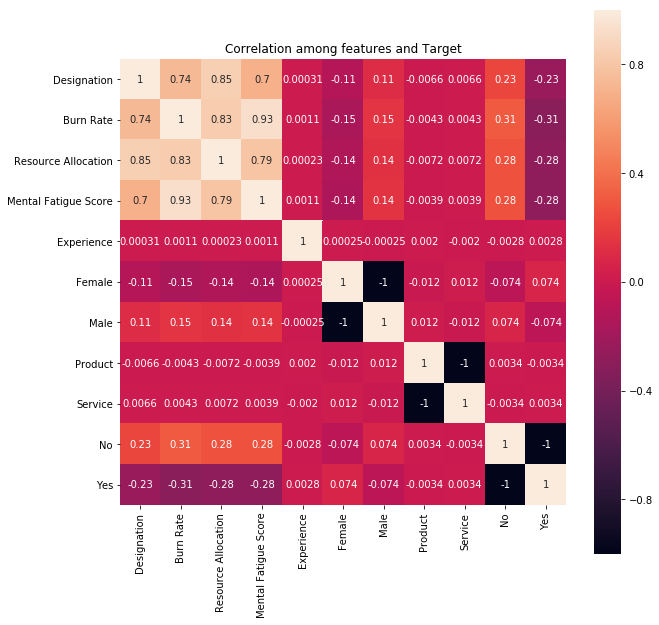

In [94]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation among features and Target")

### All features are important except One check should be there for Product and Service and Experience.

In [95]:
train.head()

,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,0.16,3.0,3.8,12.17,1,0,0,1,1,0
1,1.0,0.36,2.0,5.0,12.00,0,1,0,1,0,1
2,2.0,0.49,4.0,5.8,12.67,1,0,1,0,0,1
3,1.0,0.20,1.0,2.6,12.00,0,1,0,1,0,1
4,3.0,0.52,7.0,6.9,12.33,1,0,0,1,1,0


In [96]:
label = train['Burn Rate']
label.head()

0    0.16
1    0.36
2    0.49
3    0.20
4    0.52
Name: Burn Rate, dtype: float64

In [97]:
train = train.drop('Burn Rate',axis=1)
train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,3.0,3.8,12.17,1,0,0,1,1,0
1,1.0,2.0,5.0,12.00,0,1,0,1,0,1
2,2.0,4.0,5.8,12.67,1,0,1,0,0,1
3,1.0,1.0,2.6,12.00,0,1,0,1,0,1
4,3.0,7.0,6.9,12.33,1,0,0,1,1,0


In [98]:
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,5.0,7.7,11.92,1,0,0,1,1,0
1,1.0,2.0,5.2,12.25,1,0,1,0,0,1
2,1.0,3.0,5.9,12.00,0,1,1,0,0,1
3,3.0,6.0,4.6,12.75,1,0,0,1,1,0
4,2.0,5.0,6.4,12.33,1,0,1,0,1,0


### Min-Max Normalization

In [99]:
key_list = ['Designation','Resource Allocation','Mental Fatigue Score','Experience']

In [100]:
MIN_KEY = train[key_list].min()
MAX_KEY = train[key_list].max()

In [101]:
train[key_list] = round((train[key_list] - train[key_list].min())/(train[key_list].max() - train[key_list].min()),2)

In [102]:
train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,0.4,0.22,0.38,0.27,1,0,0,1,1,0
1,0.2,0.11,0.50,0.09,0,1,0,1,0,1
2,0.4,0.33,0.58,0.82,1,0,1,0,0,1
3,0.2,0.00,0.26,0.09,0,1,0,1,0,1
4,0.6,0.67,0.69,0.45,1,0,0,1,1,0


In [103]:
test_dataset[key_list] = round((test_dataset[key_list] - MIN_KEY)/(MAX_KEY - MIN_KEY),2)

In [104]:
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,0.4,0.44,0.77,0.00,1,0,0,1,1,0
1,0.2,0.11,0.52,0.36,1,0,1,0,0,1
2,0.2,0.22,0.59,0.09,0,1,1,0,0,1
3,0.6,0.56,0.46,0.91,1,0,0,1,1,0
4,0.4,0.44,0.64,0.45,1,0,1,0,1,0


#### Data Pre-processing is done.
* Null Value removal
* Date Handling
* Categorical Data Handling
* Feature Normalization : MIN-MAX
* Splitting into train and label

In [105]:
train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,0.4,0.22,0.38,0.27,1,0,0,1,1,0
1,0.2,0.11,0.50,0.09,0,1,0,1,0,1
2,0.4,0.33,0.58,0.82,1,0,1,0,0,1
3,0.2,0.00,0.26,0.09,0,1,0,1,0,1
4,0.6,0.67,0.69,0.45,1,0,0,1,1,0


In [106]:
label.head()

0    0.16
1    0.36
2    0.49
3    0.20
4    0.52
Name: Burn Rate, dtype: float64

In [107]:
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,0.4,0.44,0.77,0.00,1,0,0,1,1,0
1,0.2,0.11,0.52,0.36,1,0,1,0,0,1
2,0.2,0.22,0.59,0.09,0,1,1,0,0,1
3,0.6,0.56,0.46,0.91,1,0,0,1,1,0
4,0.4,0.44,0.64,0.45,1,0,1,0,1,0


In [108]:
train = train.drop('Female',axis=1)
train = train.drop('Product',axis=1)
train = train.drop('No',axis=1)

test_dataset = test_dataset.drop('Female',axis=1)
test_dataset = test_dataset.drop('Product',axis=1)
test_dataset = test_dataset.drop('No',axis=1)

In [109]:
train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Male,Service,Yes
0,0.4,0.22,0.38,0.27,0,1,0
1,0.2,0.11,0.50,0.09,1,1,1
2,0.4,0.33,0.58,0.82,0,0,1
3,0.2,0.00,0.26,0.09,1,1,1
4,0.6,0.67,0.69,0.45,0,1,0


In [110]:
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Male,Service,Yes
0,0.4,0.44,0.77,0.00,0,1,0
1,0.2,0.11,0.52,0.36,0,0,1
2,0.2,0.22,0.59,0.09,1,0,1
3,0.6,0.56,0.46,0.91,0,1,0
4,0.4,0.44,0.64,0.45,0,0,0


In [111]:
train.rename(columns={'Male':'Gender','Service':'Company Type','Yes':'WFH Setup'}, inplace=True)
test_dataset.rename(columns={'Male':'Gender','Service':'Company Type','Yes':'WFH Setup'}, inplace=True)

In [112]:
train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Gender,Company Type,WFH Setup
0,0.4,0.22,0.38,0.27,0,1,0
1,0.2,0.11,0.50,0.09,1,1,1
2,0.4,0.33,0.58,0.82,0,0,1
3,0.2,0.00,0.26,0.09,1,1,1
4,0.6,0.67,0.69,0.45,0,1,0


In [113]:
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Gender,Company Type,WFH Setup
0,0.4,0.44,0.77,0.00,0,1,0
1,0.2,0.11,0.52,0.36,0,0,1
2,0.2,0.22,0.59,0.09,1,0,1
3,0.6,0.56,0.46,0.91,0,1,0
4,0.4,0.44,0.64,0.45,0,0,0


#### Create a validation split

In [114]:
train_data,validation_data,train_label,validation_label = train_test_split(train,label,test_size=0.2,random_state=0)

In [115]:
print("Size of train data: ", train_data.shape)

Size of train data:  (17300, 7)


In [116]:
print("Size of Validation data: ", validation_data.shape)

Size of Validation data:  (4326, 7)


### Create Baseline

* Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm

In [118]:
model_linear_baseline = LinearRegression()

In [119]:
model_linear_baseline.fit(train_data,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
r2_score(validation_label,model_linear_baseline.predict(validation_data))

0.896508350290436

* SVR

In [121]:
model_svr_baseline = svm.SVR()

In [122]:
model_svr_baseline.fit(train_data,train_label)

C:\Users\alsrivas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
r2_score(validation_label,model_svr_baseline.predict(validation_data))

0.8897695580761115

* Ridge

In [124]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [125]:
model_l2_baseline = Ridge()

In [126]:
train_data.shape, train_label.shape

((17300, 7), (17300,))

In [127]:
model_l2_baseline.fit(train_data,train_label)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
r2_score(validation_label,model_l2_baseline.predict(validation_data))

0.8965045675299814

* Lasso

In [129]:
model_l1_baseline = Lasso()

In [130]:
model_l1_baseline.fit(train_data,train_label)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [131]:
r2_score(validation_label,model_l1_baseline.predict(validation_data))

-0.0002124134520677945

### Choosen model is 
 * Linear Regressor and Ridge. 
 * We will train and use validation data to search for optimal parameters in case Linear Regressor model and Ridge model.

#### k-fold cross validation

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [133]:
clf_linear_reg = LinearRegression()

In [134]:
fit_intercept=[True,False]
normalize = [True,False]
copy_X = [True,False]

In [135]:
gride = dict(fit_intercept = fit_intercept,normalize = normalize, copy_X = copy_X)

In [136]:
grid_clf = GridSearchCV(clf_linear_reg, param_grid = gride, cv=5, scoring='r2', return_train_score=False, n_jobs=-1)

In [137]:
grid_clf.fit(train, label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='r2', verbose=0)

In [138]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.8961573814042982


In [139]:
grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.89615738 0.89615738 0.89035565 0.89035565 0.89615738 0.89615738
 0.89035565 0.89035565]


In [140]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

0.8961573814042985
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


### Our final Linear Regression Model : 
* LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False) with r2-score=0.8961573814042985

In [141]:
clf_ridge_reg = Ridge()

In [142]:
alpha = [1.0,2.0,0.5,0.2,0.1]
fit_intercept = [True,False]
normalize = [True,False]
copy_X = [True,False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

In [143]:
gride = dict(alpha=alpha,fit_intercept=fit_intercept,normalize=normalize,copy_X=copy_X,solver=solver)

In [144]:
grid_clf = GridSearchCV(clf_ridge_reg, param_grid = gride, cv=5, scoring='r2', return_train_score=False, n_jobs=-1)

In [145]:
grid_clf.fit(train, label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [1.0, 2.0, 0.5, 0.2, 0.1], 'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='r2', verbose=0)

In [146]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

0.8961747874940942
{'alpha': 0.2, 'copy_X': False, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}
Ridge(alpha=0.2, copy_X=False, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)


### Our final Ridge Regression Model : 
* Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='sag', tol=0.001) 
  with r2 score = 0.8961672187830337

### Selected model is Ridge.

In [147]:
actual_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='sag', tol=0.001)

In [148]:
actual_model.fit(train,label)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [149]:
train.shape, label.shape

((21626, 7), (21626,))

In [150]:
test_prediction = actual_model.predict(test_dataset)

### Create submission.csv

import csv
with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee ID", "Burn Rate"])
    for i in range(test_dataset.shape[0]):
        if(test_prediction[i]<0):
            writer.writerow([Test_Employee_ID[i],round(0.00,2)])
        else:
            writer.writerow([Test_Employee_ID[i],round(test_prediction[i],2)])

In [153]:
import csv
with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee ID", "Burn Rate"])
    for i in range(test_dataset.shape[0]):
        if(test_prediction[i]<0):
            writer.writerow([Test_Employee_ID[i],round(0.00,3)])
        else:
            writer.writerow([Test_Employee_ID[i],round(test_prediction[i],3)])